<a href="https://colab.research.google.com/github/Gandharva-Thotla/Gandharva-Thotla/blob/main/Create_Visualizations_using_Matplotlib_Seaborn_%26_Folium.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**Create visualizations using Matplotib, Seaborn and Folium**

**Table of Contents**

*   Objectives

*   Setup

*   Installing Required Libraries

*   Importing Required Libraries

*   Scenario

*   Data Description

*   Importing data

*   Creating Visualizations for Data Analysis

**Objectives**

*   Create informativeand visually appealing plots with Matplotlib and Seaborn.
*   Apply visualization to communicate insights from the data.
*   Analyze data through using visualizations.
*   Customize visualizations.

**Setup**

For this project, we will be using the following libraries:

*   pandas for managing the data.
*   numpy for mathematical operations.
*   matplotlib for plotting.
*   seaborn for plotting.
*   Folium for plotting.

**Installing Required Libraries**

In [40]:
# Install required libraries
!pip install pandas numpy matplotlib seaborn folium

**Importing Required Libraries**

In [41]:
# Import all required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium import plugins

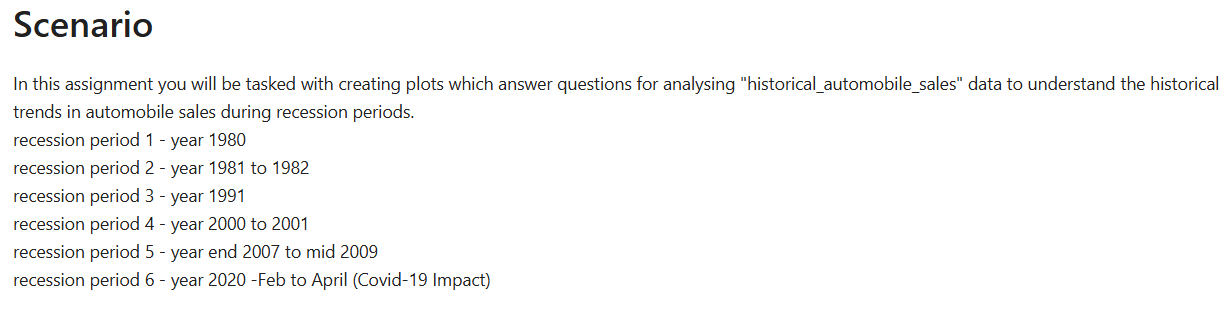

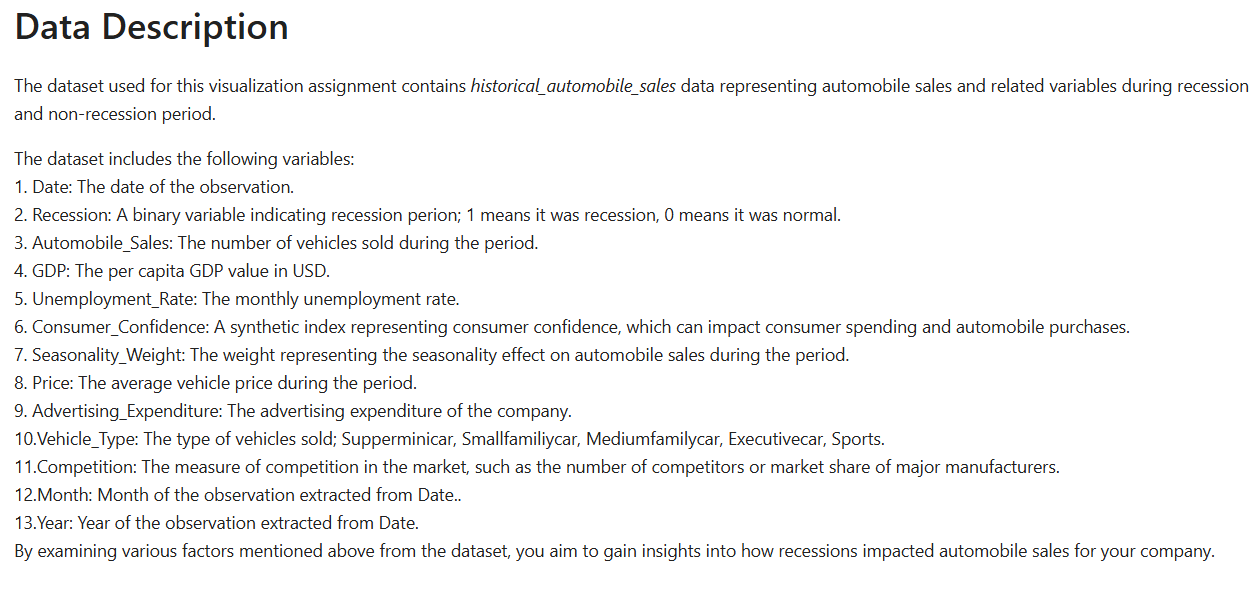

**Importing Data**

In [42]:
# Load the dataset
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/historical_automobile_sales.csv"
df = pd.read_csv(url)
print("Data downloaded and read into a dataframe!")

# Check the data
print("Dataset shape:", df.shape)
print("\nColumns:", df.columns.tolist())
print("\nFirst 5 rows:")
df.head()

Data downloaded and read into a dataframe!
Dataset shape: (528, 15)

Columns: ['Date', 'Year', 'Month', 'Recession', 'Consumer_Confidence', 'Seasonality_Weight', 'Price', 'Advertising_Expenditure', 'Competition', 'GDP', 'Growth_Rate', 'unemployment_rate', 'Automobile_Sales', 'Vehicle_Type', 'City']

First 5 rows:


,Date,Year,Month,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales,Vehicle_Type,City
0,1/31/1980,1980,Jan,1,108.24,0.50,27483.571,1558,7,60.223,0.010000,5.4,456.0,Supperminicar,Georgia
1,2/29/1980,1980,Feb,1,98.75,0.75,24308.678,3048,4,45.986,-0.309594,4.8,555.9,Supperminicar,New York
2,3/31/1980,1980,Mar,1,107.48,0.20,28238.443,3137,3,35.141,-0.308614,3.4,620.0,Mediumfamilycar,New York
3,4/30/1980,1980,Apr,1,115.01,1.00,32615.149,1653,7,45.673,0.230596,4.2,702.8,Supperminicar,Illinois
4,5/31/1980,1980,May,1,98.72,0.20,23829.233,1319,4,52.997,0.138197,5.3,770.4,Smallfamiliycar,California


In [43]:
# Check basic statistics
df.describe()

,Year,Recession,Consumer_Confidence,Seasonality_Weight,Price,Advertising_Expenditure,Competition,GDP,Growth_Rate,unemployment_rate,Automobile_Sales
count,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000,528.000000
mean,2001.500000,0.214015,101.140170,0.575795,24964.991956,3067.456439,6.064394,40.073903,-0.242001,2.453977,2352.718068
std,12.710467,0.410526,10.601154,0.454477,4888.073433,1139.564637,1.968350,16.249714,0.861268,1.119019,1645.321284
min,1980.000000,0.000000,73.900000,0.000000,8793.663000,1009.000000,3.000000,12.508000,-4.227601,1.000000,102.000000
25%,1990.750000,0.000000,94.035000,0.250000,21453.300500,2083.500000,4.000000,27.237500,-0.574049,1.600000,793.950000
50%,2001.500000,0.000000,100.740000,0.500000,25038.691500,3072.000000,6.000000,39.214500,-0.013162,2.300000,2182.600000
75%,2012.250000,0.000000,108.240000,0.750000,28131.684750,4067.250000,8.000000,53.506500,0.388932,2.900000,3614.800000
max,2023.000000,1.000000,131.670000,1.500000,44263.657000,4983.000000,9.000000,70.374000,0.815074,6.000000,21147.000000


#**Creating Visualizations for Data Analysis**

#**TASK 1.1: Develop a Line chart using the functionality of pandas to show how automobile sales fluctuate from year to year**

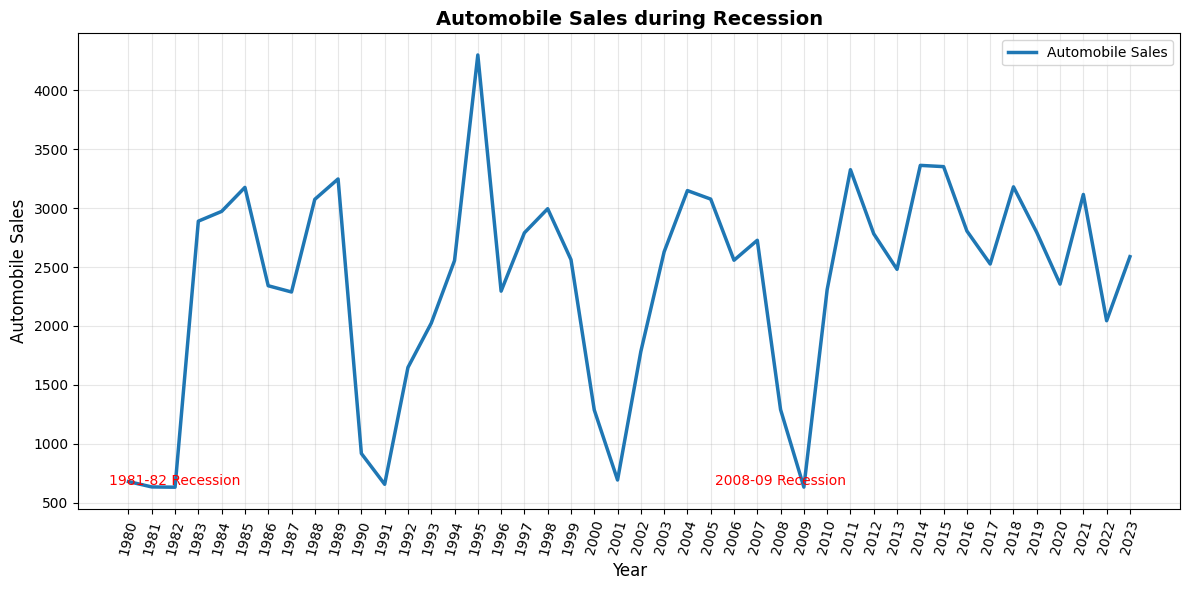

In [44]:
# Create data for plotting - average sales by year
df_line = df.groupby('Year')['Automobile_Sales'].mean()

# Create the line plot
plt.figure(figsize=(12, 6))
df_line.plot(kind='line', linewidth=2.5)

# Customize the plot
plt.xticks(list(range(1980, 2024)), rotation=75)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)
plt.title('Automobile Sales during Recession', fontsize=14, fontweight='bold')

# Add recession annotations
plt.text(1982, 650, '1981-82 Recession', fontsize=10, ha='center', color='red')
plt.text(2008, 650, '2008-09 Recession', fontsize=10, ha='center', color='red')

plt.grid(True, alpha=0.3)
plt.legend(['Automobile Sales'])
plt.tight_layout()

# Save the plot
plt.savefig('Line_Plot_1.png', dpi=300, bbox_inches='tight')
plt.show()

#**TASK 1.2: Plot different lines for categories of vehicle type and analyse the trend to answer the question Is there a noticeable difference in sales trends between different vehicle types during recession periods?**

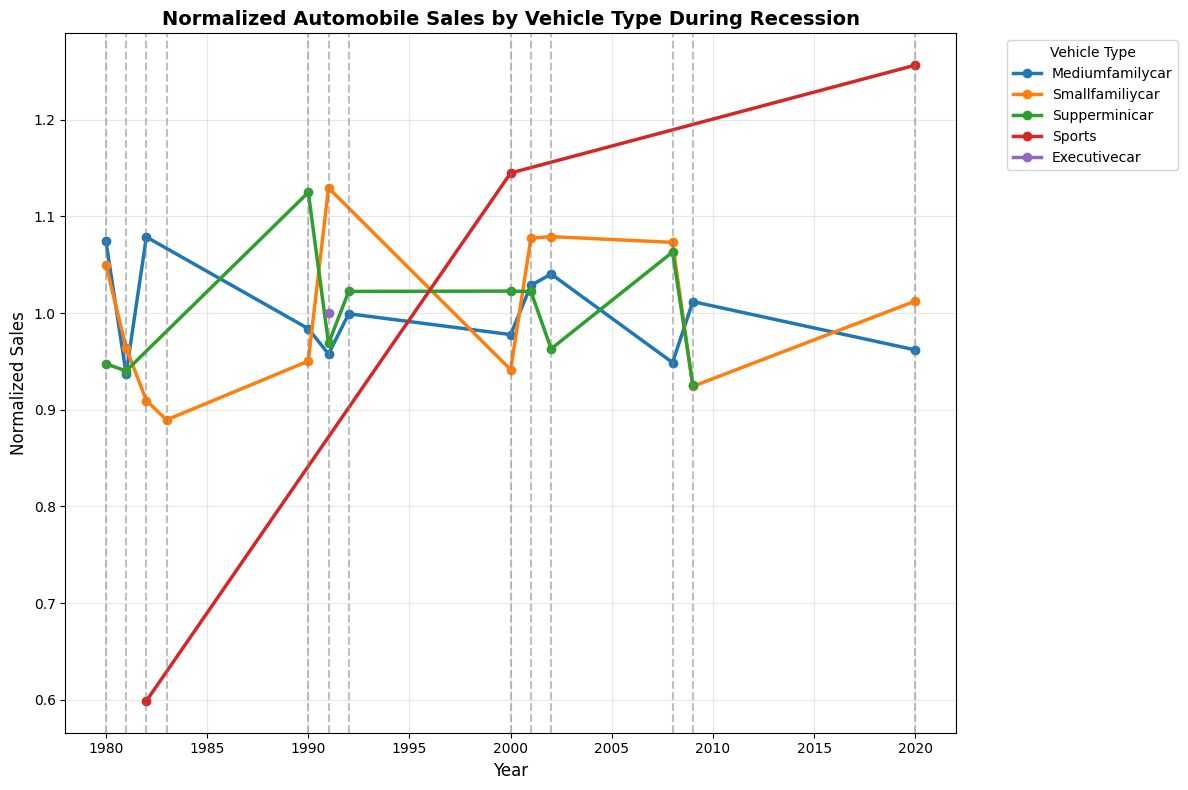

In [45]:
# Filter data for recession periods only
df_rec = df[df['Recession'] == 1]

# Calculate average sales by year and vehicle type during recession
df_Mline = df_rec.groupby(['Year', 'Vehicle_Type'], as_index=False)['Automobile_Sales'].mean()

# Calculate normalized sales (divided by average for each vehicle type)
df_Mline['Normalized_Sales'] = df_Mline.groupby('Vehicle_Type')['Automobile_Sales'].transform(lambda x: x / x.mean())

# Create the multiple line plot
plt.figure(figsize=(12, 8))

# Plot a line for each vehicle type
for vehicle_type in df_Mline['Vehicle_Type'].unique():
    data = df_Mline[df_Mline['Vehicle_Type'] == vehicle_type]
    plt.plot(data['Year'], data['Normalized_Sales'], label=vehicle_type, marker='o', linewidth=2.5)

# Highlight recession years with vertical lines
recession_years = df_rec['Year'].unique()
for year in recession_years:
    plt.axvline(x=year, color='gray', linestyle='--', alpha=0.5)

# Add labels and legend
plt.legend(title="Vehicle Type", bbox_to_anchor=(1.05, 1), loc="upper left", fontsize=10)
plt.ylabel("Normalized Sales", fontsize=12)
plt.xlabel("Year", fontsize=12)
plt.title("Normalized Automobile Sales by Vehicle Type During Recession", fontsize=14, fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the plot
plt.savefig('Line_Plot_2.png', dpi=300, bbox_inches='tight')
plt.show()

#**TASK 1.3: Use the functionality of Seaborn Library to create a visualization to compare the sales trend per vehicle type for a recession period with a non-recession period.**

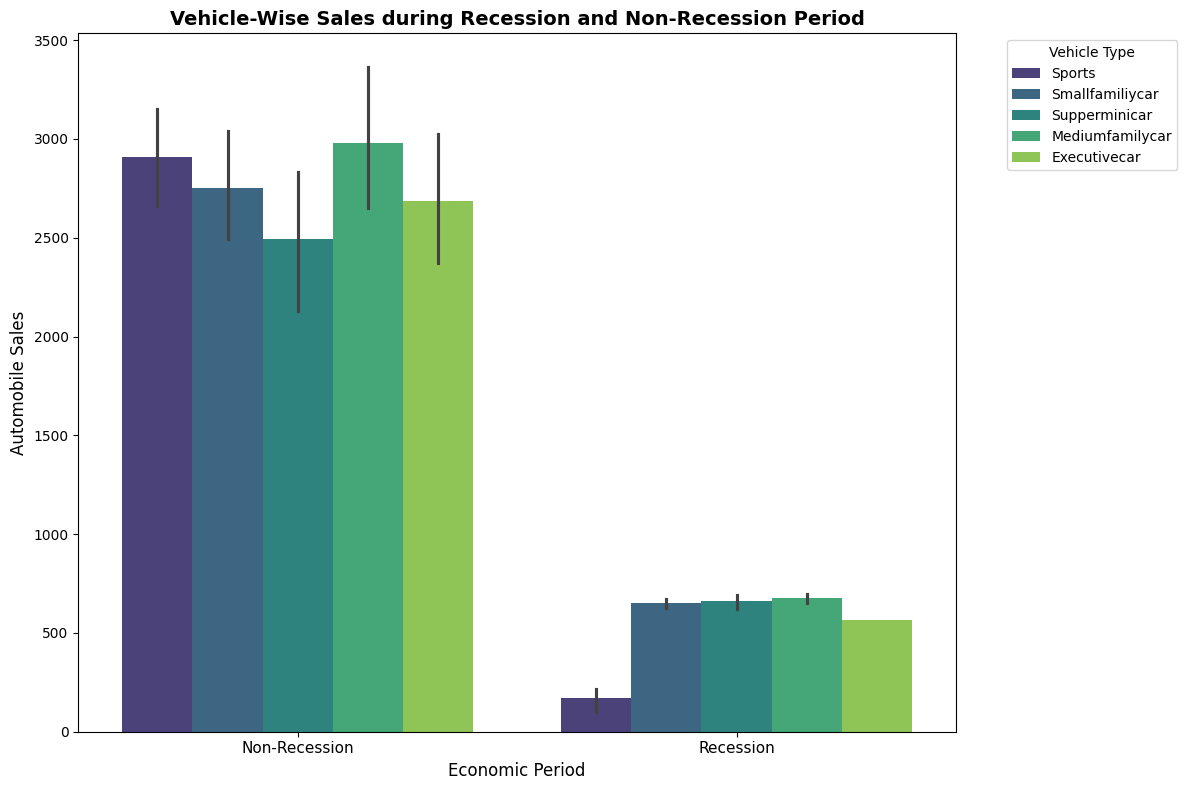

In [46]:
# Create the grouped bar chart
plt.figure(figsize=(12, 8))

# Use seaborn to create the bar plot
sns.barplot(x='Recession', y='Automobile_Sales', hue='Vehicle_Type', data=df, palette='viridis')

# Customize the plot
plt.xticks(ticks=[0, 1], labels=['Non-Recession', 'Recession'], fontsize=11)
plt.xlabel('Economic Period', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)
plt.title('Vehicle-Wise Sales during Recession and Non-Recession Period', fontsize=14, fontweight='bold')

# Position legend outside the plot
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Vehicle Type')

plt.tight_layout()

# Save the plot
plt.savefig('Bar_Chart.png', dpi=300, bbox_inches='tight')
plt.show()


#**TASK 1.4: Use sub plotting to compare the variations in GDP during recession and non-recession period by developing line plots for each period.**

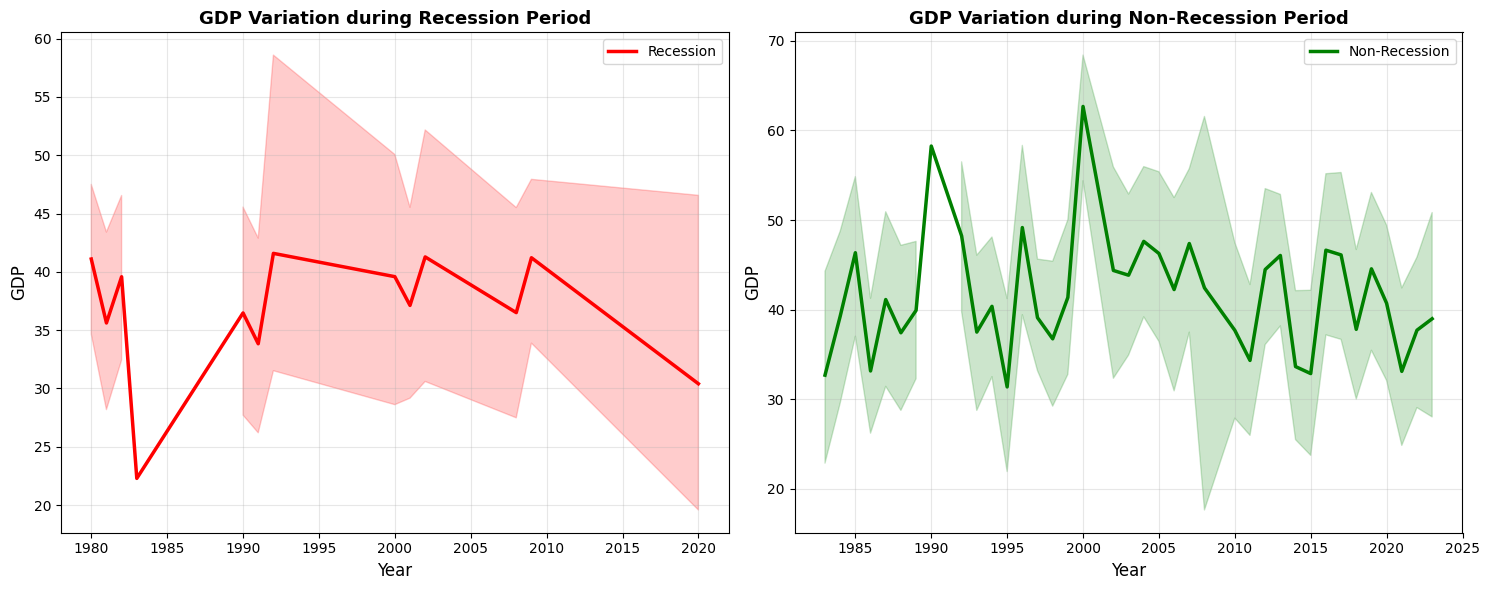

In [47]:
# Create separate dataframes for recession and non-recession periods
rec_data = df[df['Recession'] == 1]
non_rec_data = df[df['Recession'] == 0]

# Create figure with subplots
fig = plt.figure(figsize=(15, 6))

# Subplot 1: GDP during Recession Period
ax0 = fig.add_subplot(1, 2, 1)
sns.lineplot(x='Year', y='GDP', data=rec_data, label='Recession', ax=ax0, color='red', linewidth=2.5)
ax0.set_xlabel('Year', fontsize=12)
ax0.set_ylabel('GDP', fontsize=12)
ax0.set_title('GDP Variation during Recession Period', fontsize=13, fontweight='bold')
ax0.grid(True, alpha=0.3)

# Subplot 2: GDP during Non-Recession Period
ax1 = fig.add_subplot(1, 2, 2)
sns.lineplot(x='Year', y='GDP', data=non_rec_data, label='Non-Recession', ax=ax1, color='green', linewidth=2.5)
ax1.set_xlabel('Year', fontsize=12)
ax1.set_ylabel('GDP', fontsize=12)
ax1.set_title('GDP Variation during Non-Recession Period', fontsize=13, fontweight='bold')
ax1.grid(True, alpha=0.3)

plt.tight_layout()

# Save the plot
plt.savefig('Subplot.png', dpi=300, bbox_inches='tight')
plt.show()

#**TASK 1.5: Develop a Bubble plot for displaying the impact of seasonality on Automobile Sales**

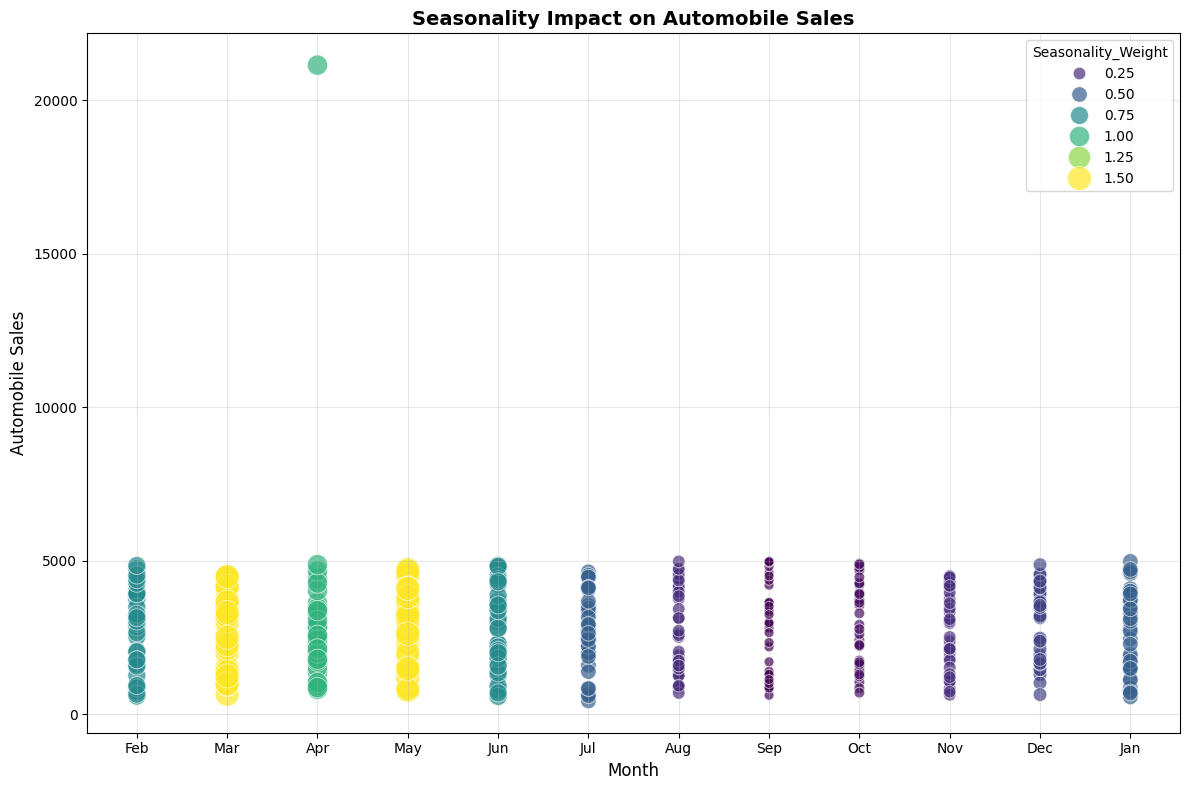

In [48]:
# Filter data for non-recession periods
non_rec_data = df[df['Recession'] == 0]

# Create bubble plot
plt.figure(figsize=(12, 8))

sns.scatterplot(
    data=non_rec_data,
    x='Month',
    y='Automobile_Sales',
    size='Seasonality_Weight',
    hue='Seasonality_Weight',
    sizes=(50, 300),  # Minimum and maximum bubble sizes
    alpha=0.7,
    palette='viridis'
)

# Customize the plot
plt.xlabel('Month', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)
plt.title('Seasonality Impact on Automobile Sales', fontsize=14, fontweight='bold')

plt.grid(True, alpha=0.3)
plt.tight_layout()

# Save the plot
plt.savefig('Bubble.png', dpi=300, bbox_inches='tight')
plt.show()

#**TASK 1.6: Use the functionality of Matplotlib to develop a scatter plot to identify the correlation between average vehicle price relate to the sales volume during recessions.**

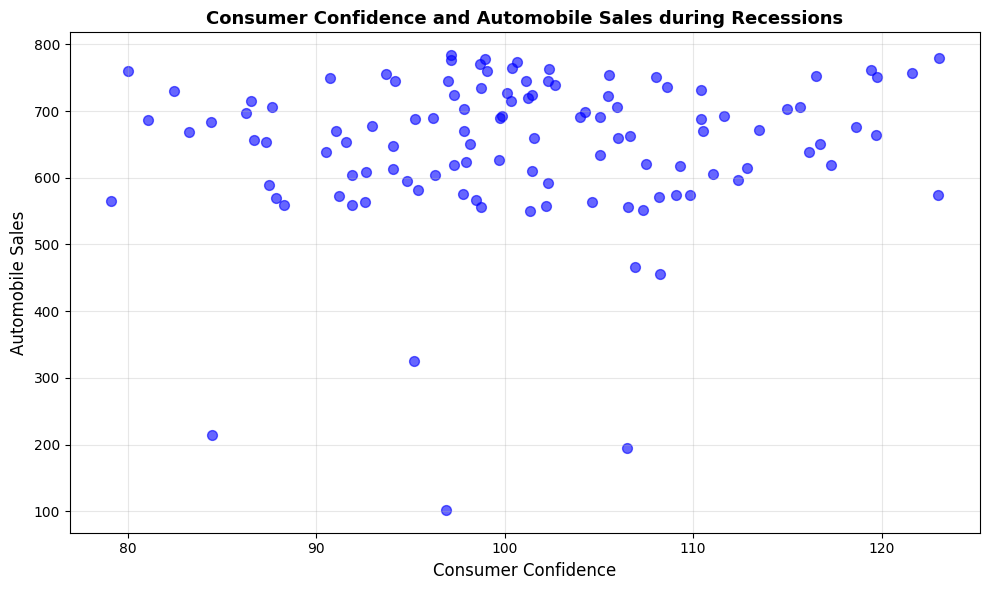

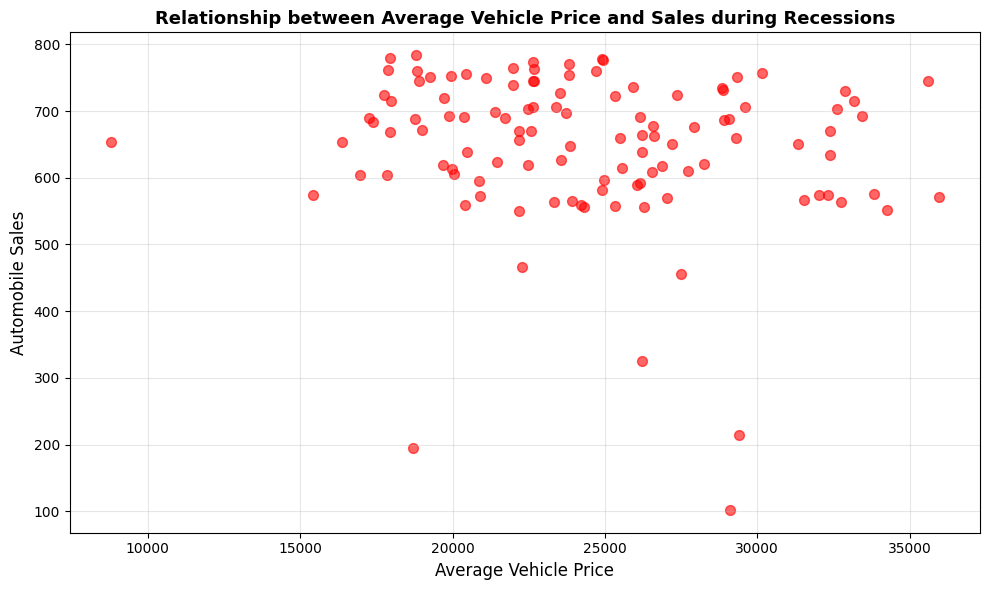

In [49]:
# Filter data for recession periods
rec_data = df[df['Recession'] == 1]

# SCATTER PLOT 1: Consumer Confidence vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Consumer_Confidence'], rec_data['Automobile_Sales'],
            alpha=0.6, color='blue', s=50)
plt.xlabel('Consumer Confidence', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)
plt.title('Consumer Confidence and Automobile Sales during Recessions', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Scatter_1.png', dpi=300, bbox_inches='tight')
plt.show()

# SCATTER PLOT 2: Price vs Sales
plt.figure(figsize=(10, 6))
plt.scatter(rec_data['Price'], rec_data['Automobile_Sales'],
            alpha=0.6, color='red', s=50)
plt.xlabel('Average Vehicle Price', fontsize=12)
plt.ylabel('Automobile Sales', fontsize=12)
plt.title('Relationship between Average Vehicle Price and Sales during Recessions', fontsize=13, fontweight='bold')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.savefig('Scatter_2.png', dpi=300, bbox_inches='tight')
plt.show()


#**TASK 1.7: Create a pie chart to display the portion of advertising expenditure of XYZ Automotives during recession and non-recession periods**

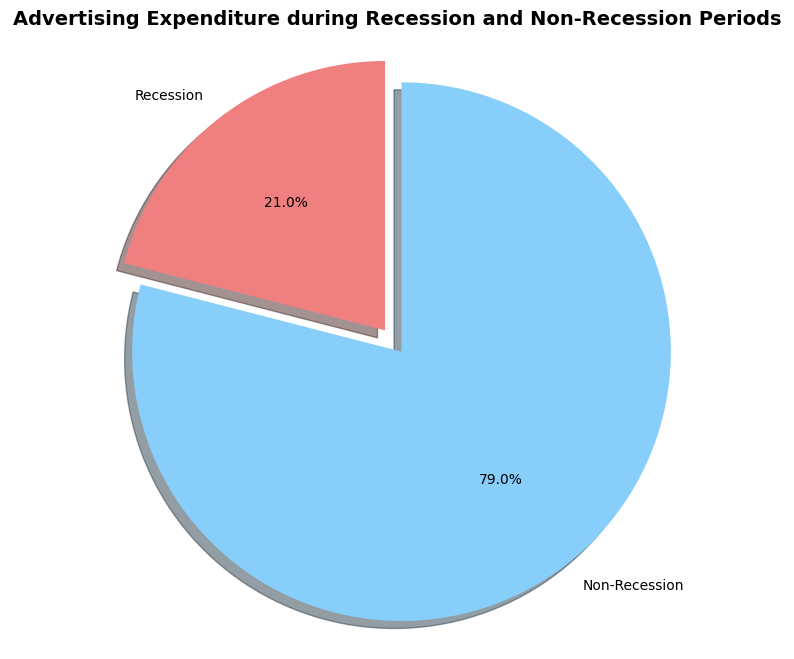

In [50]:
# Filter data for recession and non-recession periods
Rdata = df[df['Recession'] == 1]
NRdata = df[df['Recession'] == 0]

# Calculate total advertising expenditure for both periods
RAtotal = Rdata['Advertising_Expenditure'].sum()
NRAtotal = NRdata['Advertising_Expenditure'].sum()

# Create pie chart
plt.figure(figsize=(10, 8))

labels = ['Recession', 'Non-Recession']
sizes = [RAtotal, NRAtotal]
colors = ['lightcoral', 'lightskyblue']
explode = (0.1, 0)  # explode the 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)

plt.title('Advertising Expenditure during Recession and Non-Recession Periods',
          fontsize=14, fontweight='bold')

plt.axis('equal')  # Equal aspect ratio ensures pie is drawn as a circle

# Save the plot
plt.savefig('Pie_1.png', dpi=300, bbox_inches='tight')
plt.show()

**TASK 1.8: Develop a pie chart to display the total Advertisement expenditure for each vehicle type during recession period.**

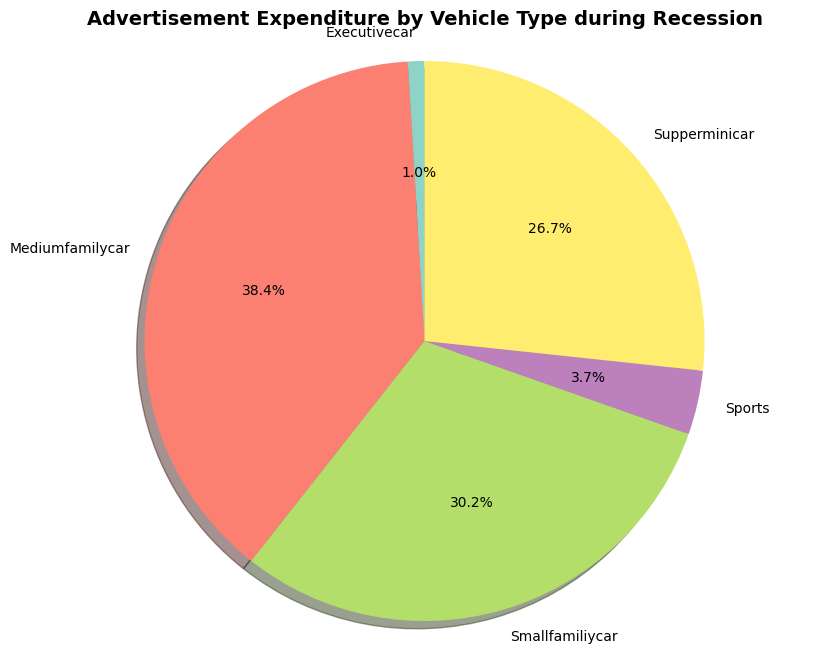

In [51]:
# Calculate advertising expenditure by vehicle type during recession
Vrexpenditure = Rdata.groupby('Vehicle_Type')['Advertising_Expenditure'].sum()

# Create pie chart
plt.figure(figsize=(10, 8))

labels = Vrexpenditure.index
sizes = Vrexpenditure.values
colors = plt.cm.Set3(np.linspace(0, 1, len(labels)))

plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', startangle=90, shadow=True)

plt.title('Advertisement Expenditure by Vehicle Type during Recession',
          fontsize=14, fontweight='bold')

plt.axis('equal')

# Save the plot
plt.savefig('Pie_2.png', dpi=300, bbox_inches='tight')
plt.show()


#**TASK 1.9: Develop a lineplot to analyse the effect of the unemployment rate on vehicle type and sales during the Recession Period.**

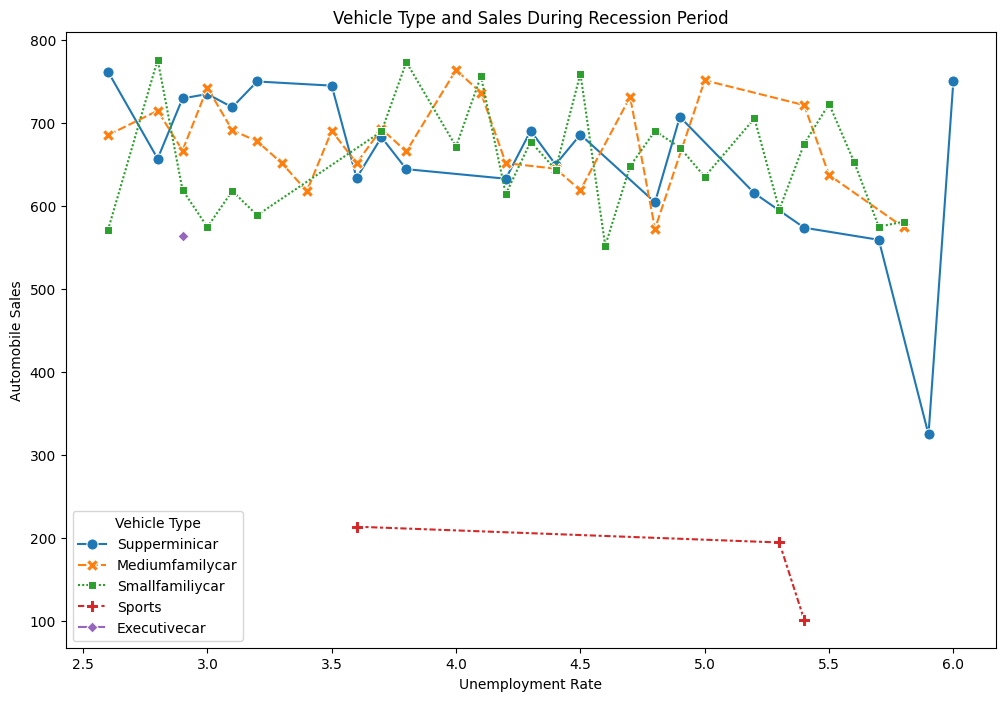

In [52]:
# Vehicle type and sales during the Recession Period
plt.figure(figsize=(12, 8))

sns.lineplot(data=df_rec, x='unemployment_rate', y='Automobile_Sales',
             hue='Vehicle_Type', style='Vehicle_Type',
             markers=True, markersize=8, errorbar=None)

plt.title('Vehicle Type and Sales During Recession Period')
plt.xlabel('Unemployment Rate')
plt.ylabel('Automobile Sales')
plt.legend(title='Vehicle Type')
plt.show()

#**TASK 1.10 Create a map on the hightest sales region/offices of the company during recession period**

In [53]:
# If you need to download the US states GeoJSON file:
import requests

url = 'https://raw.githubusercontent.com/python-visualization/folium/main/examples/data/us-states.json'
response = requests.get(url)
with open('us-states.json', 'w') as f:
    f.write(response.text)

In [54]:
# TASK 1.10: Create a map showing the highest sales regions during recession period

import folium
import pandas as pd

# Filter the data for the recession period
recession_data = df_rec  # Since df_rec is already filtered for recession

# Calculate the total sales by city
sales_by_city = recession_data.groupby('City')['Automobile_Sales'].sum().reset_index()

# Create a base map centered on the United States
map1 = folium.Map(location=[37.0902, -95.7129], zoom_start=4)

# Create a choropleth layer using folium
choropleth = folium.Choropleth(
    geo_data='us-states.json',  # Make sure this file is available
    data=sales_by_city,
    columns=['City', 'Automobile_Sales'],  # Fixed the syntax error here
    key_on='feature.properties.name',  # This should match the property in your GeoJSON
    fill_color='YlOrRd',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Automobile Sales during Recession',
    highlight=True
).add_to(map1)

# Add tooltips to show city names
choropleth.geojson.add_child(
    folium.features.GeoJsonTooltip(['name'], labels=True)
)

# Display the map
map1